In [3]:
import numpy as np
global np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
import wave
sys.path.append("../backend/")
%matplotlib inline

## Fourier Series

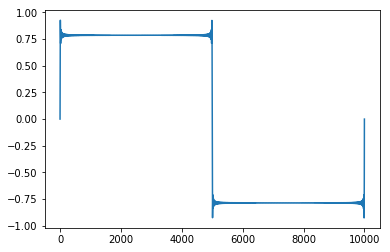

In [4]:
def fourierseries(an,bn,sr,a0=0):
    linspace = np.linspace(0.0,2*np.pi,10*sr)
    returnable = np.zeros(10*sr)
    returnable[0:] = a0/2
    if(len(an)!=len(bn)):
        print "an and bn have different lengths" 
    for i in range(len(an)):
        returnable += an[i]*np.cos((i+1)*linspace) + bn[i] * np.sin((i+1)*linspace)
    return returnable
    
def bnsquarewave(n):
    if (n%2 != 0):
        return 1.0/(n)
    else:
        return 0
    
bned = [bnsquarewave(x) for x in range(1,500)]

fourier = fourierseries(np.zeros(len(bned)),bned,1000,a0=0)
plt.plot(fourier);

# Discrete Fourier Transform vs Fourier Transform

Note that we will be working with digital signals this IAP. The standard fourier transform makes a lot of sense for continuous time signals, but in discrete time we have a slightly different transform to deal with the discrete nature of the points.
The discrete fourier transform is defined as 
$$X(k) = \sum_{n=0}^{N-1} x(n)e^{-\frac{2 \pi j k n}{N}}$$
where $N$ is the length of $x$ and $k$ is the freqency (each index into the DFT is $\frac{1}{T}$ change in frequency from the previous index where $T$ is the time domain difference in samples of $x(n)$).

## Discrete Fourier Transform

We wish to consider 

Prove the following properties about the fourier transform:
$ax_{1}(t)+bx_{2}(t) \text{ transforms to } aX_{1}(j\omega) + bX_{2}(j\omega)$

WRITE PROOF HERE
$x(t-t_{0}) \text{ transforms to } e^{-j\omega t_{0}}X(j\omega)$

WRITE PROOF HERE
$\frac{dx(t)}{dt} \text{ transforms to } j\omega X(j \omega)$

WRITE PROOF HERE
$x_{1}(t) * x_{2}(t) \text{ transforms to } X_{1}(j\omega)X_{2}(j\omega) $ NOTE THAT * IS CONVOLUTION

WRITE PROOF HERE



That last property is really neat actually. It says that convolution in the time domain is the same thing as multiplication in the frequency domain. It's one thing to prove it, and another thing to see what that means.


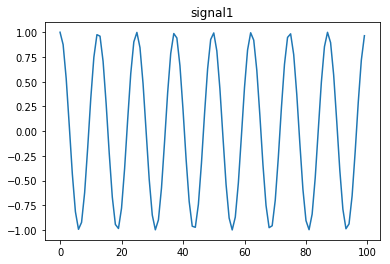

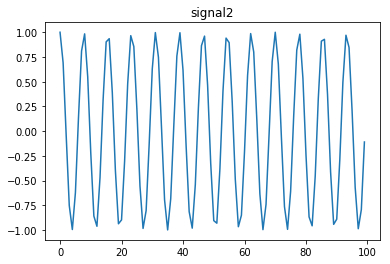

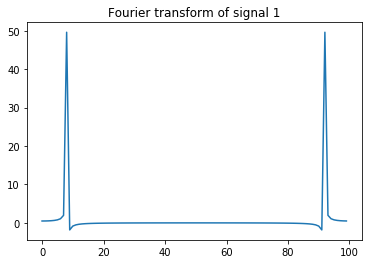

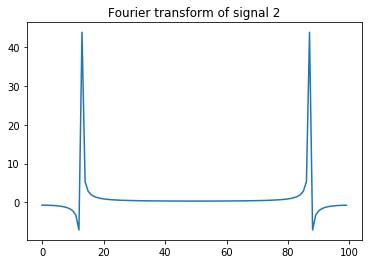

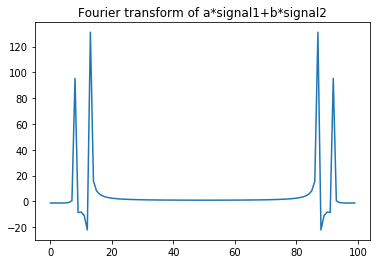

In [11]:
def linearitydemo():
    f1 = 5
    f2 = 8
    time = np.linspace(0,10,100)
    signal1 = np.cos(f1*time)
    signal2 = np.cos(f2*time)
    a = 2
    b = 3
    plt.figure()
    plt.plot(signal1)
    plt.title("signal1")
    plt.show()
    plt.figure()
    plt.plot(signal2)
    plt.title("signal2")
    plt.show()
    fourier1 = np.fft.fft(signal1)
    fourier2 = np.fft.fft(signal2)
    plt.figure()
    plt.plot(fourier1)
    plt.title("Fourier transform of signal 1")
    plt.show()
    plt.figure()
    plt.plot(fourier2)
    plt.title("Fourier transform of signal 2")
    plt.show()
    totalfourier = np.fft.fft(a*signal1+b*signal2)
    plt.figure()
    plt.plot(totalfourier)
    plt.title("Fourier transform of a*signal1+b*signal2")
    plt.show()

linearitydemo()

In [12]:
def timedelaydemo():
    pass


In [ ]:
def derivativedemo():
    pass


In [ ]:
def fourierconvolutiondemo():
    pass